
 PROJECT <BR>
Project Title : Classifying Personal Income <BR>
Name of csv file used: income.csv <BR>
Concept Used:- Binary Classification Problem <BR>

#<B> Project Description : </B><BR>
Subsidy Inc. is a company which delivers subsidies to individuals based on their income. So, if your income levels are different, you get different subsidies and so on. However and whenever someone new comes in, it is very difficult to get information about personal income. So, that is one of the most difficult pieces of data to get. So, here is an idea in terms of using an already existing database, where we have various attributes of these people and wherever personal income has been disclosed we also have that as a data. So, what we are trying to do here is, we are trying to see, <B> if we can somehow classify an income level based on the attributes that we have for individuals. So, basically this becomes then a classification problem, where we are going to say the individual has an income level beyond a certain value or below a certain value. </B> In this case we have this income level as 50000; and what we want to do is we want to classify individuals with less than 50000 personal income and greater than 50000 personal incomes. <BR>
So, this is basically a simple <B>classification technique. </B> And you one might ask, if you were able to do this how can you use it; if you have multiple customers that come in, then we can kind of identify the proportion of customers who are likely to be having an income less than 50000 and the percentage of people more than 50000; and that could allow us to be able to plan an outlay of resources and so on. So, that is one use case that you can think of. Another use case is really, if someone actually discloses an income and if it is an outlier in terms of, let us say someone says they are earning less than 50000; but our classifier says with all these attributes it is very likely the income is greater than 50000, then it might allow us to look at those particular cases in more detail, so that there is no misuse of these schemes.


##Variable Description

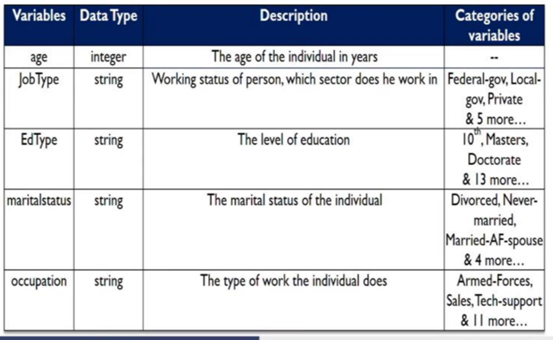

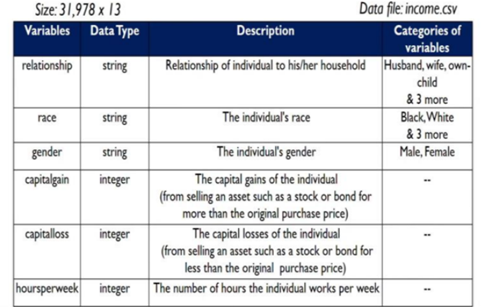

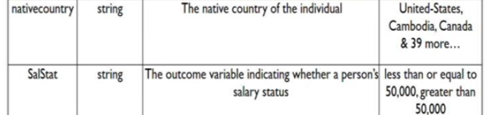

##AI Project Cycle

##Step1:- PROBLEM SCOPING

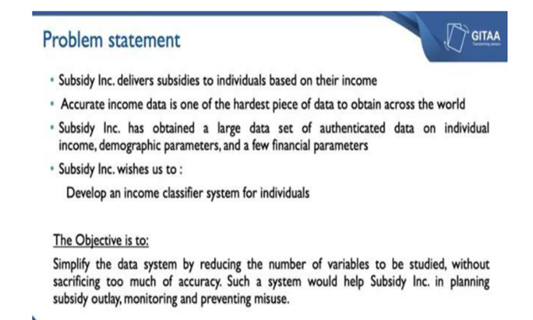

## AI PROJECT CYCLE STEP 2 :- <b> DATA ACQUISITION </b>

<A href="#top"> Top </a>

# Project Code
<A NAME="projectcode"> </a>

STEP1:- Importing Necessary Liabraries

```
# This is formatted as code
```



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#STEP2:- Importing Data into System

In [ ]:
pd.set_option('display.max_columns', 13)
data_income = pd.read_csv('/content/drive/My Drive/income.csv')
print(data_income)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [ ]:
#open income.csv file
x=[10,20,30]
y=x.copy()
y[1]=50
print(x)
print(y)



[10, 20, 30]
[10, 50, 30]


In [ ]:
data=data_income.copy()
print(data)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

## AI PROJECT CYCLE STEP 3:- DATA EXPLORATION

STEP3:- Exploratory Data Analysis <BR>
3.1 Getting to Know the data  <BR>
3.1.1  Checking datatype of variables:-      data.info()<BR>
3.1.2  Checking Missing Values:- 		data.isnull()<BR>
3.1.3 Summary of numerical variables:-    data.describe()<BR>
3.1.4 Summary of categorical variables:-    data.describe(include=”O”)<BR>
3.1.5 Frequency of each category:-  value_counts( ) <BR>
3.1.6 Checking for unique values :- np.unique()



In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [ ]:
data.isnull()


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [ ]:
summary_num= data.describe()
print(summary_num)


                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [ ]:
summary_num= data.describe(include="O")
print(summary_num)


         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [ ]:
ans= data['JobType'].value_counts()
print(ans)

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64


In [ ]:
ans=data['EdType'].value_counts()
print(ans)

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: EdType, dtype: int64


In [ ]:
print(np.unique(data['JobType']))


[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [ ]:
#replace ? with Nan Values
data=pd.read_csv('/content/drive/My Drive/income.csv', na_values=[" ?"])
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

##2. DATA PRE-PROCESSING
3.2.1 Finding Missing values <BR>
3.2.2 Dealing with Missing values <BR>
3.2.3 Deleting all rows with missing values <BR>
3.2.4 Relationship between independent variables <BR>



In [ ]:
data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False
31976,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing=data[data.isnull().any(axis=1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [ ]:
data2=data.dropna(axis=0)  # to delete all rows with na values
print(data2)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [ ]:
correlation=data.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.077490     0.057282      0.068299
capitalgain   0.077490     1.000000    -0.031499      0.079112
capitalloss   0.057282    -0.031499     1.000000      0.053106
hoursperweek  0.068299     0.079112     0.053106      1.000000


<ipython-input-19-ac989fe7b573>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


In [ ]:
correlation=data2.corr()  #corr
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


<ipython-input-20-cef092b75b03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data2.corr()  #corr


##3.3 CROSS TABLE AND DATA VISUALISATION
3.3.1 Extracting the column names <br>
3.3.2 Gender proportion table <br>
3.3.3 Two Way Cross table Gender vs Salary Status <br>
3.3.4 Frequency distribution of Salary Status- countplot() <br>
3.3.5 Histogram of Age -distplot()<br>
3.3.6 Box plot Age Vs Salary Status – boxplot()<br>

In [ ]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [ ]:
gender=pd.crosstab(index=data2['JobType'], columns= 'count')
print(gender)

col_0              count
JobType                 
 Federal-gov         943
 Local-gov          2067
 Private           22286
 Self-emp-inc       1074
 Self-emp-not-inc   2499
 State-gov          1279
 Without-pay          14


In [ ]:
EdType_salstat=pd.crosstab(index=data2['EdType'], columns=data2['SalStat'], normalize= True)
#gender_salstat=pd.crosstab(index=data2['EdType'], columns=data2['SalStat'])
print(gender_salstat)


SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.001956                       0.025230
 11th                      0.001956                       0.032790
 12th                      0.000961                       0.011538
 1st-4th                   0.000199                       0.004807
 5th-6th                   0.000398                       0.009151
 7th-8th                   0.001160                       0.017307
 9th                       0.000829                       0.014256
 Assoc-acdm                0.008488                       0.024932
 Assoc-voc                 0.011405                       0.031928
 Bachelors                 0.070486                       0.096744
 Doctorate                 0.009283                       0.003150
 HS-grad                   0.053611                       0.272628
 Masters                   0.030436                       0.02

In [ ]:
salstat=sns.countplot(data2['SalStat'])


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


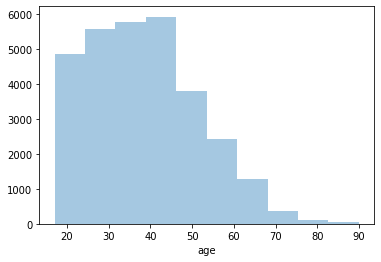

In [ ]:
sns.distplot(data2['age'], bins=10, kde= False)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


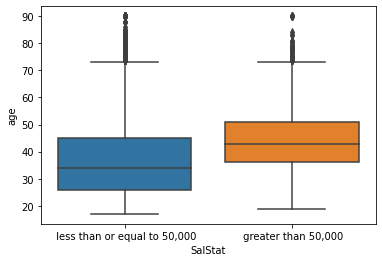

In [ ]:
sns.boxplot('SalStat', 'age', data=data2)

In [ ]:
#use groupby to show the following output

In [ ]:
data2=data.dropna(axis=0)

x= data2['SalStat'][0]
y= data2['SalStat'][2]
#print(data2)
print("x= ", x)
print("y= ", y)
data2['SalStat']=data2['SalStat'].map({x:0, y:1})
print(data2['SalStat'])

In [ ]:
new_data=pd.get_dummies(data2, drop_first= True)
print(new_data)

In [ ]:
column_list=list(new_data.columns)
print(column_list)


['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [ ]:
features=list(set(column_list)-set(['SalStat']))
print(features)

['JobType_ Without-pay', 'nativecountry_ Peru', 'maritalstatus_ Married-spouse-absent', 'nativecountry_ Yugoslavia', 'maritalstatus_ Separated', 'EdType_ 9th', 'nativecountry_ Guatemala', 'nativecountry_ Honduras', 'EdType_ 11th', 'maritalstatus_ Widowed', 'gender_ Male', 'race_ Black', 'nativecountry_ Ecuador', 'capitalloss', 'occupation_ Tech-support', 'nativecountry_ France', 'nativecountry_ Nicaragua', 'nativecountry_ Ireland', 'capitalgain', 'EdType_ 5th-6th', 'nativecountry_ El-Salvador', 'nativecountry_ Poland', 'nativecountry_ Haiti', 'nativecountry_ India', 'occupation_ Protective-serv', 'nativecountry_ Iran', 'relationship_ Not-in-family', 'nativecountry_ Thailand', 'hoursperweek', 'EdType_ Some-college', 'nativecountry_ Hungary', 'occupation_ Farming-fishing', 'maritalstatus_ Married-civ-spouse', 'occupation_ Transport-moving', 'nativecountry_ Cuba', 'EdType_ Doctorate', 'nativecountry_ United-States', 'nativecountry_ Germany', 'age', 'EdType_ Assoc-acdm', 'occupation_ Craft

In [ ]:
y= new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [ ]:
x= new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
train_x, test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state=0)
logistic=LogisticRegression(max_iter=10000)
logistic.fit(train_x,train_y)

LogisticRegression(max_iter=10000)

In [ ]:
prediction=logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 1]


In [ ]:
confusion_matrix=confusion_matrix(test_y,prediction)
print(confusion_matrix)

[[4217  313]
 [ 636  867]]


In [ ]:
accuracy_score=accuracy_score(test_y,prediction)
print(accuracy_score)

0.8426984916293718


In [ ]:
print("Mis classified samples: %d" %(test_y!=prediction).sum())

Mis classified samples: 949
